# Meterological Data Analysis
> In this project we are going to perform analysis of Meteorological data. Our goal of this project is to transform the raw data into information and then convert that information into knowledge.

- toc:true
- branch: master
- badges: true
- comments: true
- author: Sumanashree
- categories: [DataAnalysis]

**A null hypothesis to be considered is : “Ho : Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming”.**

**The Ho means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not.**

**Everytime a new jupyter notebook instance is opened,it requires the following command to be run to increase autocomplete speed**

In [1]:
%config Completer.use_jedi = False

**Let's first import the required Libraries.**

In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

#set seaborn plotting aesthetics as default
sns.set()

**Create path which points to project folder**

In [3]:
project_path = Path.cwd().parent
project_path

PosixPath('/mnt/d/workspace/suma/_Internship/Project_1_md')

**Let's store the path of the file to be read in the variable data_path**

In [4]:
data_path = project_path/"data"/"weatherHistory.csv"
data_path

PosixPath('/mnt/d/workspace/suma/_Internship/Project_1_md/data/weatherHistory.csv')

**Now,we load the dataset using the pd.read_csv command and we use head() function to display the top few rows of the dataset.**

In [5]:
df = pd.read_csv(data_path)
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.


**We use tail() function to display the last few rows of the dataset** 

In [6]:
df.tail(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,1016.16,Partly cloudy starting in the morning.


**Let's change the Formatted Date from String to Datetime**

In [7]:
#Changing Formatted Date from String to Datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date'][0]

Timestamp('2006-03-31 22:00:00+0000', tz='UTC')

**Now we'll sort the data by date using the function sort_values**

In [8]:
df = df.sort_values(by = 'Formatted Date')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
2880,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,1016.15,Mostly cloudy throughout the day.


**we use info() function to print the concise summary of dataframe which includes index dtype,column dtypes,non-null values and memory usage**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96453 entries, 2880 to 89732
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  int64              
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime6

**Let's print the summary of the data**

In [10]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


**Now, we will select only those columns which are of our use and leave others.**

**Selected columns are: "Formatted Date", "Apparent Temperature (C)", "Humidity"**

In [11]:
features = ["Formatted Date", "Apparent Temperature (C)", "Humidity"]
th = df[features]
th.head()

,Formatted Date,Apparent Temperature (C),Humidity
2880,2005-12-31 23:00:00+00:00,-4.050000,0.89
2881,2006-01-01 00:00:00+00:00,-3.238889,0.85
2882,2006-01-01 01:00:00+00:00,-3.155556,0.82
2883,2006-01-01 02:00:00+00:00,-2.194444,0.82
2884,2006-01-01 03:00:00+00:00,-2.744444,0.86


**Let's set the DataFrame index using the existing columns**

In [12]:
th = th.set_index('Formatted Date')
th.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 23:00:00+00:00,-4.050000,0.89
2006-01-01 00:00:00+00:00,-3.238889,0.85
2006-01-01 01:00:00+00:00,-3.155556,0.82
2006-01-01 02:00:00+00:00,-2.194444,0.82
2006-01-01 03:00:00+00:00,-2.744444,0.86


**Now select the data from the year 2006  using iloc() function.**

In [13]:
# delete 2005 row 
th = th.iloc[1:]
th.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-01 00:00:00+00:00,-3.238889,0.85
2006-01-01 01:00:00+00:00,-3.155556,0.82
2006-01-01 02:00:00+00:00,-2.194444,0.82
2006-01-01 03:00:00+00:00,-2.744444,0.86
2006-01-01 04:00:00+00:00,-3.072222,0.85


**Print the concise summary of the required data.**

In [14]:
th.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96452 entries, 2006-01-01 00:00:00+00:00 to 2016-12-31 22:00:00+00:00
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  96452 non-null  float64
 1   Humidity                  96452 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


**Now we'll print the summary of the dataset 'th'**

In [15]:
th.describe()

,Apparent Temperature (C),Humidity
count,96452.000000,96452.000000
mean,10.855183,0.734897
std,10.696795,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


**Let's plot the line graph for the data**

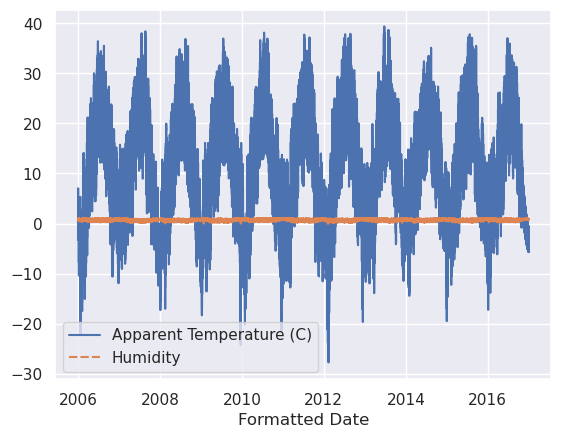

In [16]:
sns.lineplot(data=th);

**Resample('M') simply converting the hourly data to monthly by taking the mean.**

In [17]:
montly_th = th.resample('M').mean()
montly_th.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
2006-05-31 00:00:00+00:00,15.539479,0.721801


**It gives the concise summary for the monthly data.**

In [18]:
montly_th.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2006-01-31 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Freq: M
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Apparent Temperature (C)  132 non-null    float64
 1   Humidity                  132 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


**It's time to visualize our data using some outstanding libraries called matplotlib and seaborn.**

**Now,have avlook at the variation of 'Apparent Temperature' and 'Humidity' over time.**

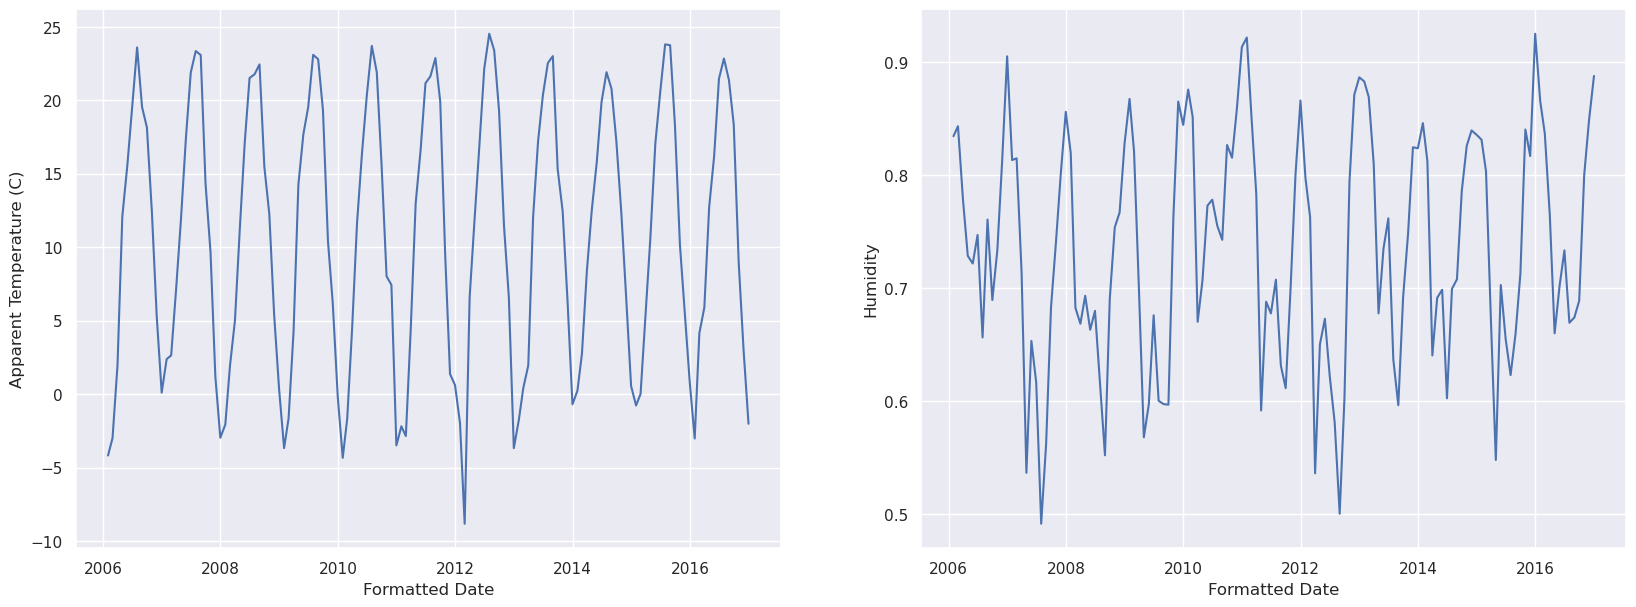

In [19]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (20, 7))

#create boxplot in each subplot
sns.lineplot(data=montly_th, x='Formatted Date', y='Apparent Temperature (C)', ax=axes[0])
sns.lineplot(data=montly_th, x='Formatted Date', y='Humidity', ax=axes[1])
plt.show()

**Now we'll retrieve the data of the particular month from every year.**

In [20]:
month_idx = 3# March
montly_th_march = montly_th[montly_th.index.month == month_idx]
montly_th_march

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 00:00:00+00:00,1.969780,0.778737
2007-03-31 00:00:00+00:00,7.174619,0.713884
2008-03-31 00:00:00+00:00,5.004353,0.668468
2009-03-31 00:00:00+00:00,4.280585,0.696680
2010-03-31 00:00:00+00:00,4.589038,0.670161
2011-03-31 00:00:00+00:00,4.589785,0.782970
2012-03-31 00:00:00+00:00,6.591502,0.535941
2013-03-31 00:00:00+00:00,1.957445,0.809946
2014-03-31 00:00:00+00:00,8.408303,0.640403


**Now, let's plot the graph of temperature with humidity for the particular month.**

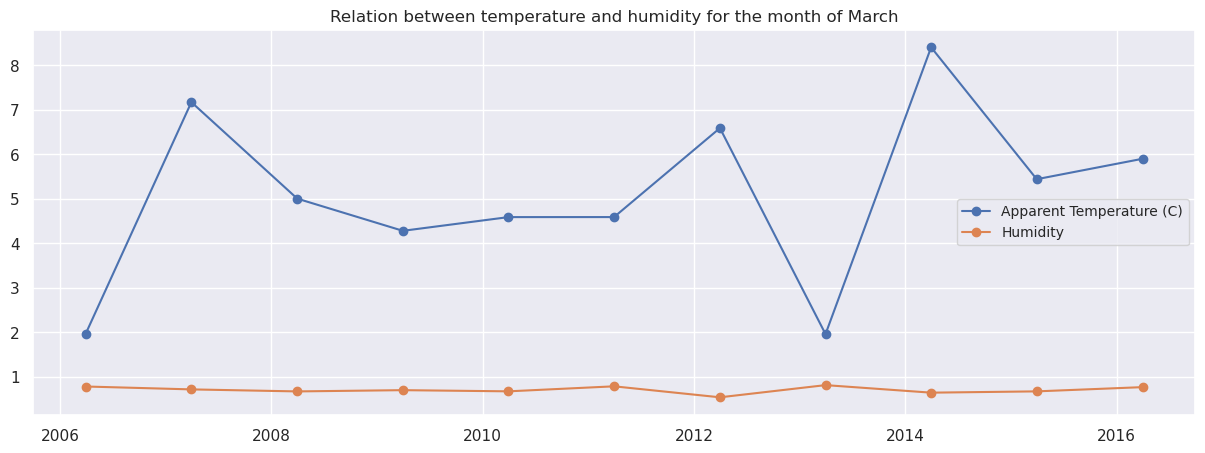

In [21]:
plt.figure(figsize=(15, 5))

plt.plot(montly_th_march, marker='o', label=['Apparent Temperature (C)','Humidity'] );
plt.legend(loc = 'center right', fontsize = 10)
plt.title('Relation between temperature and humidity for the month of March')
plt.show()

**From the above graph it is clear that for the year 2007,there is a sudden increase in the temperature and again it falls after 2007 and reaches the minimum in the year 2013.Temperature reaches maximum in the year 2014 and this is the maximum temperature of march.**

## Conclusion ##

**Our environment is highly affected by Global Warming. From our analysis it's been a clear observation that their is sudden increase in temperature and sudden decrease in temperature over ten years. But, in case of humidity, it is seen that it neither rise of fall instead stayed same over 10 years.**

#### "I am thankful to mentors at https://internship.suvenconsultants.com for providing awesome problem statements and giving many of us a Coding Internship Exprience. Thank you www.suvenconsultants.com"
